In [47]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from pandas import DataFrame, Series
import seaborn as sns
import apyori as ap
from apyori import apriori #Apriori Algorithm
import mlxtend as ml
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [48]:
AdultUCIdata = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
               sep=",", names=["age", "type_employer", "fnlwgt", "education", 
               "education_num", "marital", "occupation", "relationship", "race","sex",
               "capital_gain", "capital_loss", "hr_per_week", "country", "income"])

AdultUCIdata.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [49]:
AdultUCIdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age              32561 non-null int64
type_employer    32561 non-null object
fnlwgt           32561 non-null int64
education        32561 non-null object
education_num    32561 non-null int64
marital          32561 non-null object
occupation       32561 non-null object
relationship     32561 non-null object
race             32561 non-null object
sex              32561 non-null object
capital_gain     32561 non-null int64
capital_loss     32561 non-null int64
hr_per_week      32561 non-null int64
country          32561 non-null object
income           32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


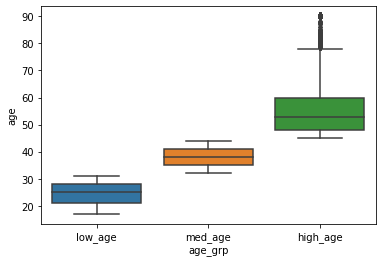

In [50]:
AdultUCIdata["age_grp"] = pd.qcut(AdultUCIdata.age, 3,
                                  labels = ['low_age','med_age','high_age'])
AdultUCIdata["capitalgain_grp"] = pd.cut(AdultUCIdata.capital_gain, 2,
                                         labels = ['low_gain','high_gain'])
AdultUCIdata["capitalloss_grp"] = pd.cut(AdultUCIdata.capital_loss, 2,
                                         labels = ['low_loss','high_loss'])
AdultUCIdata["hr_perweek_grp"] = pd.cut(AdultUCIdata.hr_per_week, [0, 39, 45, 80],
                                        labels = ['low_hr','normal_hr','high_hr'])

sns.boxplot(x='age_grp',y='age',data=AdultUCIdata)

In [51]:
AdultUCIdata = AdultUCIdata.astype('str')
AdultUCIdata.loc[:,['age', 'age_grp', 'capital_gain', 'capitalgain_grp',
                    'hr_per_week', 'hr_perweek_grp']].head(5)

,age,age_grp,capital_gain,capitalgain_grp,hr_per_week,hr_perweek_grp
0,39,med_age,2174,low_gain,40,normal_hr
1,50,high_age,0,low_gain,13,low_hr
2,38,med_age,0,low_gain,40,normal_hr
3,53,high_age,0,low_gain,40,normal_hr
4,28,low_age,0,low_gain,40,normal_hr


In [52]:
AdultUCIdata[AdultUCIdata.columns] = AdultUCIdata.apply(lambda x: x.str.strip())
AdultUCIdata[AdultUCIdata.columns] 

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income,age_grp,capitalgain_grp,capitalloss_grp,hr_perweek_grp
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,med_age,low_gain,low_loss,normal_hr
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,high_age,low_gain,low_loss,low_hr
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,med_age,low_gain,low_loss,normal_hr
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,high_age,low_gain,low_loss,normal_hr
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,low_age,low_gain,low_loss,normal_hr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,low_age,low_gain,low_loss,low_hr
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,med_age,low_gain,low_loss,normal_hr
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,high_age,low_gain,low_loss,normal_hr
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,low_age,low_gain,low_loss,low_hr


In [53]:
AdultUCIdata = AdultUCIdata.astype('object')
AdultUCIdata

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income,age_grp,capitalgain_grp,capitalloss_grp,hr_perweek_grp
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,med_age,low_gain,low_loss,normal_hr
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,high_age,low_gain,low_loss,low_hr
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,med_age,low_gain,low_loss,normal_hr
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,high_age,low_gain,low_loss,normal_hr
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,low_age,low_gain,low_loss,normal_hr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,low_age,low_gain,low_loss,low_hr
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,med_age,low_gain,low_loss,normal_hr
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,high_age,low_gain,low_loss,normal_hr
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,low_age,low_gain,low_loss,low_hr


In [54]:
AdultUCIdata2 = AdultUCIdata.drop(['age', 'capital_gain', 'hr_per_week', 
                                   'capital_loss', 'fnlwgt'], axis=1)
AdultUCIdata2

,type_employer,education,education_num,marital,occupation,relationship,race,sex,country,income,age_grp,capitalgain_grp,capitalloss_grp,hr_perweek_grp
0,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K,med_age,low_gain,low_loss,normal_hr
1,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K,high_age,low_gain,low_loss,low_hr
2,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K,med_age,low_gain,low_loss,normal_hr
3,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K,high_age,low_gain,low_loss,normal_hr
4,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K,low_age,low_gain,low_loss,normal_hr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K,low_age,low_gain,low_loss,low_hr
32557,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K,med_age,low_gain,low_loss,normal_hr
32558,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K,high_age,low_gain,low_loss,normal_hr
32559,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K,low_age,low_gain,low_loss,low_hr


In [55]:
AdultUCIdata3 = AdultUCIdata2[AdultUCIdata['country'] == 'United-States']
AdultUCIdata3

,type_employer,education,education_num,marital,occupation,relationship,race,sex,country,income,age_grp,capitalgain_grp,capitalloss_grp,hr_perweek_grp
0,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K,med_age,low_gain,low_loss,normal_hr
1,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K,high_age,low_gain,low_loss,low_hr
2,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K,med_age,low_gain,low_loss,normal_hr
3,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K,high_age,low_gain,low_loss,normal_hr
5,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K,med_age,low_gain,low_loss,normal_hr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K,low_age,low_gain,low_loss,low_hr
32557,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K,med_age,low_gain,low_loss,normal_hr
32558,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K,high_age,low_gain,low_loss,normal_hr
32559,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K,low_age,low_gain,low_loss,low_hr


In [56]:
AdultUCIdata4 = pd.DataFrame({col: str(col)+'=' for col in AdultUCIdata3}, index=AdultUCIdata3.index) + AdultUCIdata3.astype(str)
AdultUCIdata4.head()

,type_employer,education,education_num,marital,occupation,relationship,race,sex,country,income,age_grp,capitalgain_grp,capitalloss_grp,hr_perweek_grp
0,type_employer=State-gov,education=Bachelors,education_num=13,marital=Never-married,occupation=Adm-clerical,relationship=Not-in-family,race=White,sex=Male,country=United-States,income=<=50K,age_grp=med_age,capitalgain_grp=low_gain,capitalloss_grp=low_loss,hr_perweek_grp=normal_hr
1,type_employer=Self-emp-not-inc,education=Bachelors,education_num=13,marital=Married-civ-spouse,occupation=Exec-managerial,relationship=Husband,race=White,sex=Male,country=United-States,income=<=50K,age_grp=high_age,capitalgain_grp=low_gain,capitalloss_grp=low_loss,hr_perweek_grp=low_hr
2,type_employer=Private,education=HS-grad,education_num=9,marital=Divorced,occupation=Handlers-cleaners,relationship=Not-in-family,race=White,sex=Male,country=United-States,income=<=50K,age_grp=med_age,capitalgain_grp=low_gain,capitalloss_grp=low_loss,hr_perweek_grp=normal_hr
3,type_employer=Private,education=11th,education_num=7,marital=Married-civ-spouse,occupation=Handlers-cleaners,relationship=Husband,race=Black,sex=Male,country=United-States,income=<=50K,age_grp=high_age,capitalgain_grp=low_gain,capitalloss_grp=low_loss,hr_perweek_grp=normal_hr
5,type_employer=Private,education=Masters,education_num=14,marital=Married-civ-spouse,occupation=Exec-managerial,relationship=Wife,race=White,sex=Female,country=United-States,income=<=50K,age_grp=med_age,capitalgain_grp=low_gain,capitalloss_grp=low_loss,hr_perweek_grp=normal_hr


In [57]:
melted_data = pd.melt(AdultUCIdata4)
melted_data.head()

,variable,value
0,type_employer,type_employer=State-gov
1,type_employer,type_employer=Self-emp-not-inc
2,type_employer,type_employer=Private
3,type_employer,type_employer=Private
4,type_employer,type_employer=Private


In [58]:
frequency = melted_data.groupby(by=['value'])['value'].count().sort_values(ascending=True)
frequency

value
type_employer=Never-worked        7
occupation=Armed-Forces           9
type_employer=Without-pay        13
education_num=1                  17
education=Preschool              17
                              ...  
income=<=50K                  21999
race=White                    25621
capitalloss_grp=low_loss      28966
capitalgain_grp=low_gain      29028
country=United-States         29170
Name: value, Length: 90, dtype: int64

In [59]:
freq_itemset = pd.DataFrame({'item':frequency.index, 'frequency':frequency.values})
freq_itemset

,item,frequency
0,type_employer=Never-worked,7
1,occupation=Armed-Forces,9
2,type_employer=Without-pay,13
3,education_num=1,17
4,education=Preschool,17
...,...,...
85,income=<=50K,21999
86,race=White,25621
87,capitalloss_grp=low_loss,28966
88,capitalgain_grp=low_gain,29028


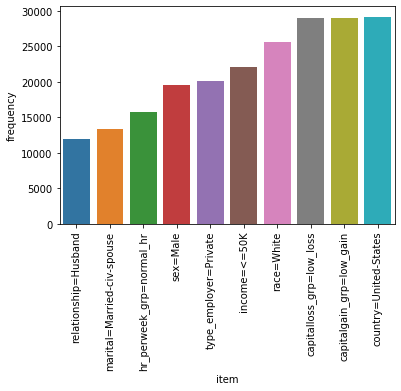

In [60]:
g = sns.barplot(data=freq_itemset.tail(10), x='item', y='frequency')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

In [61]:
records = []
for i in range(0,len(AdultUCIdata4)):
    records.append([str(AdultUCIdata4.values[i,j]) 
    for j in range(0, len(AdultUCIdata4.columns))])


In [62]:
frequent_itemset = ap.apriori(records, min_support=0.8, min_confidence=0.8,
                              min_lift=1,min_length=2)
results = list(frequent_itemset)
results

[RelationRecord(items=frozenset({'capitalgain_grp=low_gain'}), support=0.9951319849160096, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'capitalgain_grp=low_gain'}), confidence=0.9951319849160096, lift=1.0)]),
 RelationRecord(items=frozenset({'capitalloss_grp=low_loss'}), support=0.9930065135413095, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'capitalloss_grp=low_loss'}), confidence=0.9930065135413095, lift=1.0)]),
 RelationRecord(items=frozenset({'country=United-States'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'country=United-States'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'race=White'}), support=0.8783339046966061, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'race=White'}), confidence=0.8783339046966061, lift=1.0)]),
 RelationRecord(items=frozenset({'capitalgain_grp=low_gain', 'capitalloss_gr

In [63]:
len(results)

15

In [64]:
results[1:5]

[RelationRecord(items=frozenset({'capitalloss_grp=low_loss'}), support=0.9930065135413095, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'capitalloss_grp=low_loss'}), confidence=0.9930065135413095, lift=1.0)]),
 RelationRecord(items=frozenset({'country=United-States'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'country=United-States'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'race=White'}), support=0.8783339046966061, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'race=White'}), confidence=0.8783339046966061, lift=1.0)]),
 RelationRecord(items=frozenset({'capitalgain_grp=low_gain', 'capitalloss_grp=low_loss'}), support=0.9881384984573192, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'capitalgain_grp=low_gain', 'capitalloss_grp=low_loss'}), confidence=0.9881384984573192, lift=1.0)])]

In [65]:
te = TransactionEncoder()
records

[['type_employer=State-gov',
  'education=Bachelors',
  'education_num=13',
  'marital=Never-married',
  'occupation=Adm-clerical',
  'relationship=Not-in-family',
  'race=White',
  'sex=Male',
  'country=United-States',
  'income=<=50K',
  'age_grp=med_age',
  'capitalgain_grp=low_gain',
  'capitalloss_grp=low_loss',
  'hr_perweek_grp=normal_hr'],
 ['type_employer=Self-emp-not-inc',
  'education=Bachelors',
  'education_num=13',
  'marital=Married-civ-spouse',
  'occupation=Exec-managerial',
  'relationship=Husband',
  'race=White',
  'sex=Male',
  'country=United-States',
  'income=<=50K',
  'age_grp=high_age',
  'capitalgain_grp=low_gain',
  'capitalloss_grp=low_loss',
  'hr_perweek_grp=low_hr'],
 ['type_employer=Private',
  'education=HS-grad',
  'education_num=9',
  'marital=Divorced',
  'occupation=Handlers-cleaners',
  'relationship=Not-in-family',
  'race=White',
  'sex=Male',
  'country=United-States',
  'income=<=50K',
  'age_grp=med_age',
  'capitalgain_grp=low_gain',
  'cap

In [66]:
te_ary = te.fit(records).transform(records)
te_ary

array([[False, False,  True, ..., False,  True, False],
       [ True, False, False, ...,  True, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [ True, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False]])

In [67]:
df = pd.DataFrame(te_ary, columns=te.columns_)
df 

,age_grp=high_age,age_grp=low_age,age_grp=med_age,capitalgain_grp=high_gain,capitalgain_grp=low_gain,capitalloss_grp=high_loss,capitalloss_grp=low_loss,country=United-States,education=10th,education=11th,...,sex=Male,type_employer=?,type_employer=Federal-gov,type_employer=Local-gov,type_employer=Never-worked,type_employer=Private,type_employer=Self-emp-inc,type_employer=Self-emp-not-inc,type_employer=State-gov,type_employer=Without-pay
0,False,False,True,False,True,False,True,True,False,False,...,True,False,False,False,False,False,False,False,True,False
1,True,False,False,False,True,False,True,True,False,False,...,True,False,False,False,False,False,False,True,False,False
2,False,False,True,False,True,False,True,True,False,False,...,True,False,False,False,False,True,False,False,False,False
3,True,False,False,False,True,False,True,True,False,True,...,True,False,False,False,False,True,False,False,False,False
4,False,False,True,False,True,False,True,True,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29165,False,True,False,False,True,False,True,True,False,False,...,False,False,False,False,False,True,False,False,False,False
29166,False,False,True,False,True,False,True,True,False,False,...,True,False,False,False,False,True,False,False,False,False
29167,True,False,False,False,True,False,True,True,False,False,...,False,False,False,False,False,True,False,False,False,False
29168,False,True,False,False,True,False,True,True,False,False,...,True,False,False,False,False,True,False,False,False,False


In [68]:
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.995132,(capitalgain_grp=low_gain)
1,0.993007,(capitalloss_grp=low_loss)
2,1.000000,(country=United-States)
3,0.537299,(hr_perweek_grp=normal_hr)
4,0.754165,(income=<=50K)
...,...,...
74,0.604354,"(country=United-States, race=White, type_emplo..."
75,0.646075,"(capitalloss_grp=low_loss, race=White, income=..."
76,0.533116,"(type_employer=Private, capitalloss_grp=low_lo..."
77,0.596332,"(capitalloss_grp=low_loss, race=White, country..."


In [69]:
frequent_itemsets.sort_values(by='support',ascending=False).head(10)

,support,itemsets
2,1.000000,(country=United-States)
0,0.995132,(capitalgain_grp=low_gain)
9,0.995132,"(country=United-States, capitalgain_grp=low_gain)"
15,0.993007,"(country=United-States, capitalloss_grp=low_loss)"
1,0.993007,(capitalloss_grp=low_loss)
30,0.988138,"(country=United-States, capitalgain_grp=low_ga..."
8,0.988138,"(capitalgain_grp=low_gain, capitalloss_grp=low..."
5,0.878334,(race=White)
23,0.878334,"(country=United-States, race=White)"
12,0.873740,"(race=White, capitalgain_grp=low_gain)"


In [70]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(country=United-States),(capitalgain_grp=low_gain),1.000000,0.995132,0.995132,0.995132,1.000000,0.000000,1.000000
1,(capitalgain_grp=low_gain),(country=United-States),0.995132,1.000000,0.995132,1.000000,1.000000,0.000000,inf
2,(hr_perweek_grp=normal_hr),(capitalgain_grp=low_gain),0.537299,0.995132,0.535859,0.997320,1.002199,0.001176,1.816581
3,(capitalgain_grp=low_gain),(hr_perweek_grp=normal_hr),0.995132,0.537299,0.535859,0.538480,1.002199,0.001176,1.002560
4,(income=<=50K),(capitalgain_grp=low_gain),0.754165,0.995132,0.754165,1.000000,1.004892,0.003671,inf


In [71]:
rules[(rules['lift']>1) & (rules['confidence'] > 0.8)].head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(hr_perweek_grp=normal_hr),(capitalgain_grp=low_gain),0.537299,0.995132,0.535859,0.997320,1.002199,0.001176,1.816581
4,(income=<=50K),(capitalgain_grp=low_gain),0.754165,0.995132,0.754165,1.000000,1.004892,0.003671,inf
6,(type_employer=Private),(capitalgain_grp=low_gain),0.690264,0.995132,0.687727,0.996325,1.001199,0.000823,1.324561
10,(hr_perweek_grp=normal_hr),(capitalloss_grp=low_loss),0.537299,0.993007,0.534008,0.993875,1.000874,0.000467,1.141760
12,(income=<=50K),(capitalloss_grp=low_loss),0.754165,0.993007,0.751388,0.996318,1.003335,0.002497,1.899379
14,(type_employer=Private),(capitalloss_grp=low_loss),0.690264,0.993007,0.686596,0.994686,1.001691,0.001159,1.316017
28,(sex=Male),(race=White),0.668084,0.878334,0.605177,0.905839,1.031316,0.018376,1.292114
31,(type_employer=Private),(race=White),0.690264,0.878334,0.607748,0.880457,1.002417,0.001465,1.017759
34,"(hr_perweek_grp=normal_hr, capitalgain_grp=low...",(capitalloss_grp=low_loss),0.535859,0.993007,0.532568,0.993858,1.000858,0.000456,1.138700
35,"(hr_perweek_grp=normal_hr, capitalloss_grp=low...",(capitalgain_grp=low_gain),0.534008,0.995132,0.532568,0.997304,1.002182,0.001160,1.805454


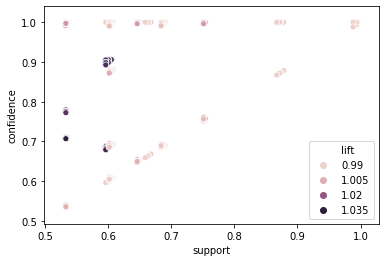

In [72]:
b = sns.scatterplot(data=rules,x='support',y='confidence',hue='lift')
plt.show()

In [73]:
def SupervisedApriori(data,consequent,min_supp,min_conf,min_lift):
    frequent_itemsets = apriori(data, min_supp, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_conf)
    #filter according to lift
    rules = rules[rules['lift'] > min_lift]
    sup_rules = pd.DataFrame()
    for i in consequent:
        df = rules[rules['consequents'] == {i}]
        sup_rules = sup_rules.append(df,ignore_index = True)
    return(sup_rules)
    

In [80]:
SupervisedApriori(df,consequent = ['income=>50K','income=<=50K'],
min_supp=0.04, min_conf=0.7, min_lift=1).sort_values(by='support',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
17,(capitalgain_grp=low_gain),(income=<=50K),0.995132,0.754165,0.754165,0.757854,1.004892,0.003671,1.015236
74,"(country=United-States, capitalgain_grp=low_gain)",(income=<=50K),0.995132,0.754165,0.754165,0.757854,1.004892,0.003671,1.015236
96,"(country=United-States, capitalloss_grp=low_loss)",(income=<=50K),0.993007,0.754165,0.751388,0.756680,1.003335,0.002497,1.010336
73,"(capitalgain_grp=low_gain, capitalloss_grp=low...",(income=<=50K),0.988138,0.754165,0.751388,0.760408,1.008278,0.006169,1.026056
432,"(country=United-States, capitalgain_grp=low_ga...",(income=<=50K),0.988138,0.754165,0.751388,0.760408,1.008278,0.006169,1.026056
...,...,...,...,...,...,...,...,...,...
5767,"(age_grp=low_age, capitalloss_grp=low_loss, ma...",(income=<=50K),0.040247,0.754165,0.040144,0.997445,1.322581,0.009791,96.203337
2168,"(marital=Never-married, occupation=Adm-clerica...",(income=<=50K),0.041035,0.754165,0.040110,0.977444,1.296060,0.009162,10.898674
3967,"(capitalloss_grp=low_loss, marital=Never-marri...",(income=<=50K),0.041035,0.754165,0.040110,0.977444,1.296060,0.009162,10.898674
5028,"(capitalloss_grp=low_loss, marital=Never-marri...",(income=<=50K),0.040967,0.754165,0.040110,0.979079,1.298229,0.009214,11.750902


In [81]:
from sklearn.preprocessing import MinMaxScaler

In [82]:
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

In [83]:
scaler = MinMaxScaler()

In [86]:
scaler.fit(df)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [87]:
scaler.transform(data)

ValueError: operands could not be broadcast together with shapes (4,2) (90,) (4,2) 